In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
print(os.getcwd())
from json import load
import pickle

import sys
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop")
sys.path.insert(0, workdir)

from compare_agents import MultipleAgentsComparator


/home/ashilova/Adaptive_stopping_MC_RL/adastop/example_simulatedR


/home/ashilova/miniconda3/envs/rlberry/lib/python3.8/site-packages/gym/envs/registration.py:423: UserWarning: WARN: Custom namespace `MinAtar` is being overridden by namespace `MinAtar`. If you are developing a plugin you shouldn't specify a namespace in `register` calls. The namespace is specified through the entry point package metadata.
  logger.warn(
/home/ashilova/miniconda3/envs/rlberry/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ashilova/miniconda3/envs/rlberry/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
# path_res = "./mgres"
path_res = "/home/rdellave/Adaptive_stopping_MC_RL/adastop/example_simulatedR/mgres"

In [3]:
li = os.listdir(path_res)
n_iters = {}
decs = {}
for elem in li:
    elem_path = os.path.join(path_res, elem)
    with open(elem_path,"rb") as f:
        params, comp = pickle.load(f)
    dmu = params["diff_means"]

    if dmu in n_iters.keys():
        n_iters[dmu].append(comp["n_iter"] / 2)
    else:
        n_iters[dmu] = [comp["n_iter"]/2]

    if dmu in decs.keys():
        decs[dmu].append(comp["decision"])
    else:
        decs[dmu] = [comp["decision"]]


Note that in the following we plot 3 stds to cover 99% confidence interval

In [4]:
power = {}
power_std = {}
power_confidence_interval = {}
n_iter_avg = {}
sqrt_n = np.sqrt(len(decs[0]))
print(sqrt_n)

for dmu in decs.keys():
    p = np.array(decs[dmu]) == "reject"
    power[dmu] = np.mean(p)
    power_std[dmu] = np.std(p)
    power_confidence_interval[dmu] = np.std(p)/sqrt_n*3
for k in n_iters.keys():
    n_iter_avg[k] = np.mean(n_iters[k])

powers, power_stds, power_confidence_intervals = dict(sorted(power.items())),  dict(sorted(power_std.items())), dict(sorted(power_confidence_interval.items())) 

100.0


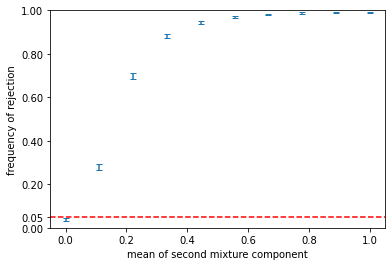

In [5]:
import sys
import os
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)

plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylim((0,1))
plt.yticks(np.append(np.linspace(0,1,6),0.05))
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
plt.errorbar(powers.keys(), powers.values(), list(power_confidence_intervals.values()), linestyle='None', fmt = "none", capsize=3)
plt.ylabel("frequency of rejection")
plt.xlabel("mean of second mixture component")

plt.savefig(os.path.join(workdir, "gaussianVSmg.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg.pdf"))




## Means tests

In [6]:
# path_res = "./mgres"
path_res2 = "/home/ashilova/Adaptive_stopping_MC_RL/adastop/example_simulatedR/mgres/exp1"

In [7]:
li = os.listdir(path_res2)
n_iters2 = {}
decs2 = {}
for elem in li:
    elem_path = os.path.join(path_res2, elem)
    with open(elem_path,"rb") as f:
        params, comp = pickle.load(f)
    dmu = params["dist_params"]

    if dmu in n_iters2.keys():
        n_iters2[dmu].append(list(comp.n_iters.values())[0] / 2)
    else:
        n_iters2[dmu] = [list(comp.n_iters.values())[0] / 2]

    if dmu in decs2.keys():
        decs2[dmu].append(list(comp.decisions.values())[0])
    else:
        decs2[dmu] = [list(comp.decisions.values())[0]]


In [8]:
len(decs2[0.7777777777777777])

5000

Note that in the following we plot 3 stds to cover 99% confidence interval

In [9]:
power2 = {}
power_std2 = {}
power_confidence_interval2 = {}
n_iter_avg2 = {}
sqrt_n = np.sqrt(len(decs2[0]))
print(sqrt_n)

for dmu in decs2.keys():
    p = np.array(decs2[dmu]) != "equal"
    power2[dmu] = np.mean(p)
    power_std2[dmu] = np.std(p)
    power_confidence_interval2[dmu] = np.std(p)/sqrt_n*3
for k in n_iters2.keys():
    n_iter_avg2[k] = np.mean(n_iters2[k])

powers2, power_stds2, power_confidence_intervals2 = dict(sorted(power2.items())),  dict(sorted(power_std2.items())), dict(sorted(power_confidence_interval2.items())) 

70.71067811865476


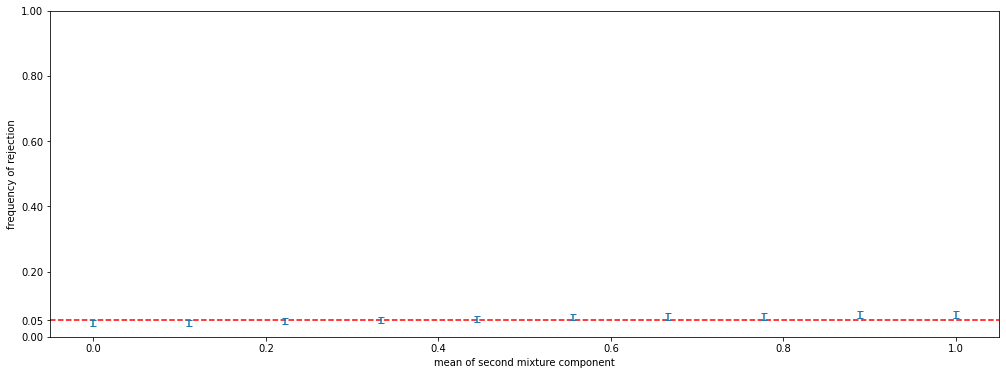

In [10]:
import sys
import os
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)

plt.figure(figsize=(17,6))

plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylim((0,1))
plt.yticks(np.append(np.linspace(0,1,6),0.05))
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
plt.errorbar(powers2.keys(), powers2.values(), list(power_confidence_intervals2.values()), linestyle='None', fmt = "none", capsize=3)
plt.ylabel("frequency of rejection")
plt.xlabel("mean of second mixture component")

plt.savefig(os.path.join(workdir, "gaussianVSmg_samemean.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg_samemean.pdf"))




In [101]:
import pandas as pd

power_df = pd.DataFrame(powers, index=["Case 2"])
power_df = power_df.append(pd.DataFrame(powers2, index = ["Case 1"]))



error_df = pd.DataFrame(power_confidence_intervals, index=["Case 2"])
error_df = error_df.append(pd.DataFrame(power_confidence_intervals2, index = ["Case 1"]))

annot1 = {}
annot2 = {}

for k in powers.keys():
    print(k)
    annot1[k] = ("{:.3f}\n($\\pm${:.3f})".format(powers[k], power_confidence_intervals[k]))
    annot2[k] = ("{:.3f}\n($\\pm${:.3f})".format(powers2[k], power_confidence_intervals2[k]))

annot_df = pd.DataFrame(annot1, index=["Case 2"])
annot_df = annot_df.append(pd.DataFrame(annot2, index = ["Case 1"]))

# annot1 = [r"{:.3f} ($\pm$ {:.3f})".format(powers[i], power_confidence_interval[i]) for i in range(len(powers))]
# annot2 = [r"{:.3f} ($\pm$ {:.3f})".format(powers2[i], power_confidence_interval2[i]) for i in range(len(powers2))]


0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


/tmp/ipykernel_1504422/2804652902.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  power_df = power_df.append(pd.DataFrame(powers2, index = ["Case 1"]))
/tmp/ipykernel_1504422/2804652902.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_df = error_df.append(pd.DataFrame(power_confidence_intervals2, index = ["Case 1"]))
/tmp/ipykernel_1504422/2804652902.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annot_df = annot_df.append(pd.DataFrame(annot2, index = ["Case 1"]))


In [102]:
annot_df

,0.000000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000
Case 2,0.037\n($\pm$0.006),0.279\n($\pm$0.013),0.700\n($\pm$0.014),0.881\n($\pm$0.010),0.944\n($\pm$0.007),0.969\n($\pm$0.005),0.981\n($\pm$0.004),0.988\n($\pm$0.003),0.991\n($\pm$0.003),0.992\n($\pm$0.003)
Case 1,0.042\n($\pm$0.009),0.042\n($\pm$0.009),0.049\n($\pm$0.009),0.051\n($\pm$0.009),0.055\n($\pm$0.010),0.061\n($\pm$0.010),0.062\n($\pm$0.010),0.062\n($\pm$0.010),0.070\n($\pm$0.011),0.070\n($\pm$0.011)


In [103]:
powers

{0.0: 0.0372,
 0.1111111111111111: 0.2786,
 0.2222222222222222: 0.6995,
 0.3333333333333333: 0.8806,
 0.4444444444444444: 0.944,
 0.5555555555555556: 0.969,
 0.6666666666666666: 0.9813,
 0.7777777777777777: 0.9879,
 0.8888888888888888: 0.9905,
 1.0: 0.9915}

In [104]:
labels = [r"0", r"$\frac{1}{9}$", r"$\frac{2}{9}$", r"$\frac{3}{9}$", r"$\frac{4}{9}$", r"$\frac{5}{9}$", r"$\frac{6}{9}$",r"$\frac{7}{9}$", r"$\frac{8}{9}$", r"1"]

In [105]:
power_df_fancy = power_df.copy()

In [106]:
power_df_fancy

,0.000000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000
Case 2,0.0372,0.2786,0.6995,0.8806,0.9440,0.9690,0.9813,0.9879,0.9905,0.9915
Case 1,0.0422,0.0420,0.0486,0.0514,0.0552,0.0606,0.0618,0.0624,0.0696,0.0696


In [107]:
power_df_fancy.columns = labels
error_df.columns = labels

In [108]:
annot_df_fancy = annot_df.copy()

In [109]:
annot_df_fancy.columns = labels
annot_df_fancy

,0,$\frac{1}{9}$,$\frac{2}{9}$,$\frac{3}{9}$,$\frac{4}{9}$,$\frac{5}{9}$,$\frac{6}{9}$,$\frac{7}{9}$,$\frac{8}{9}$,1
Case 2,0.037\n($\pm$0.006),0.279\n($\pm$0.013),0.700\n($\pm$0.014),0.881\n($\pm$0.010),0.944\n($\pm$0.007),0.969\n($\pm$0.005),0.981\n($\pm$0.004),0.988\n($\pm$0.003),0.991\n($\pm$0.003),0.992\n($\pm$0.003)
Case 1,0.042\n($\pm$0.009),0.042\n($\pm$0.009),0.049\n($\pm$0.009),0.051\n($\pm$0.009),0.055\n($\pm$0.010),0.061\n($\pm$0.010),0.062\n($\pm$0.010),0.062\n($\pm$0.010),0.070\n($\pm$0.011),0.070\n($\pm$0.011)


<>:30: DeprecationWarning: invalid escape sequence \D
/home/ashilova/miniconda3/envs/rlberry/lib/python3.8/site-packages/seaborn/matrix.py:213: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


[Text(1, 0.0, '0.00'), Text(1, 0.05, '0.05'), Text(1, 0.2, '0.20'), Text(1, 0.4, '0.40'), Text(1, 0.6, '0.60'), Text(1, 0.8, '0.80'), Text(1, 1.0, '1.00')]


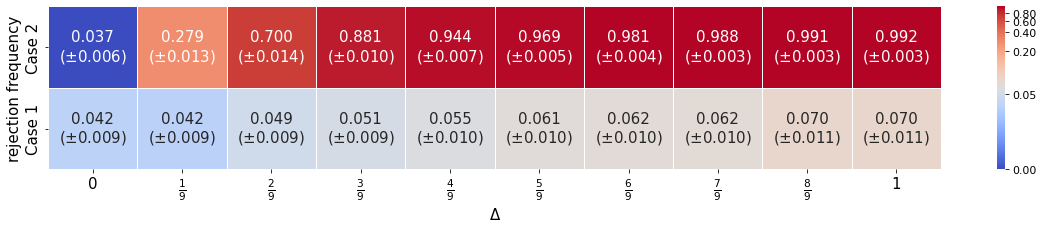

In [145]:
import sys
import matplotlib
import os
import seaborn as sns
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })

plt.rcParams.update({'font.size': 15})


fig, ax1 = plt.subplots(1,1, figsize=(20,3))

# sns.heatmap(power_df_fancy, vmin = 0, vmax=1, annot=annot_df_fancy, fmt="s", linewidths=.5, ax=ax1, cmap = "Spectral", center = 0.05)
# sns.heatmap(power_df_fancy, annot=annot_df_fancy, fmt="s", linewidths=.5, ax=ax1, cmap = "coolwarm", norm = matplotlib.colors.PowerNorm(0.23137821315975918))
sns.heatmap(power_df_fancy, annot=annot_df_fancy, fmt="s", linewidths=.5, ax=ax1, cmap = "coolwarm", norm = matplotlib.colors.PowerNorm(0.18), cbar_kws={"ticks": [0, 0.05, 0.2, 0.4, 0.6, 0.8, 1]})
cbar = ax1.collections[0].colorbar

ticklabs = cbar.ax.get_yticklabels()
# ticklabs +=["0.05"]
print(ticklabs)

cbar.ax.set_yticklabels(ticklabs, fontsize=11)

plt.xlabel("$\Delta$")
plt.ylabel("rejection frequency")




# plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
# plt.ylim((0,1))
# plt.yticks(np.append(np.linspace(0,1,6),0.05))
# plt.errorbar(powers.keys(), powers.values(), list(power_confidence_intervals.values()), linestyle='None', fmt = "none", capsize=5, label = "different mean", color = "#8856a7", linewidth=4)
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
# plt.errorbar(powers2.keys(), powers2.values(), list(power_confidence_intervals2.values()), linestyle='None', fmt = "none", capsize=5, label = "same mean", color = '#43a2ca', linewidth = 4)
# plt.ylabel("frequency of rejection")
# plt.xlabel("$\Delta$")
# plt.legend(loc = "right")

plt.savefig(os.path.join(workdir, "gaussianVSmg_exp1-2.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg_exp1-2.pdf"), bbox_inches='tight')

In [132]:
ax1.images

<Axes.ArtistList of 0 images>

<>:30: DeprecationWarning: invalid escape sequence \D


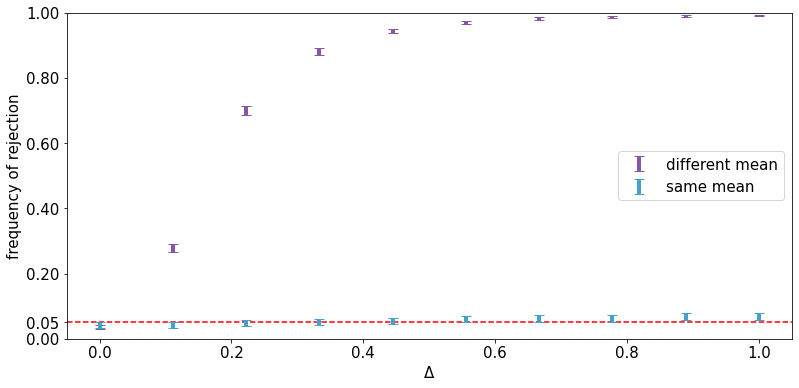

In [ ]:
import sys
import os
import seaborn

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })

plt.rcParams.update({'font.size': 15})


plt.figure(figsize=(13,6))



home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)



plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylim((0,1))
plt.yticks(np.append(np.linspace(0,1,6),0.05))
plt.errorbar(powers.keys(), powers.values(), list(power_confidence_intervals.values()), linestyle='None', fmt = "none", capsize=5, label = "different mean", color = "#8856a7", linewidth=4)
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
plt.errorbar(powers2.keys(), powers2.values(), list(power_confidence_intervals2.values()), linestyle='None', fmt = "none", capsize=5, label = "same mean", color = '#43a2ca', linewidth = 4)
plt.ylabel("frequency of rejection")
plt.xlabel("$\Delta$")
plt.legend(loc = "right")

plt.savefig(os.path.join(workdir, "gaussianVSmg_exp1-2.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg_exp1-2.pdf"), bbox_inches='tight')

## Analysing FWE

In [147]:
import seaborn as sns

def plot_results_table(comp, fname, agent_names=None, axes = None):
    """
    visual representation of results.

    Parameters
    ----------
    agent_names : list of str or None
    axes : tuple of two matplotlib axes of None
            if None, use the following:
            `fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": [1, 2]}, figsize=(6,5))`
    """

    id_sort = np.argsort(comp.mean_eval_values)
    # Z = [comp.eval_values[comp.agent_names[i]] for i  in id_sort]

    if agent_names is None:
        agent_names = comp.agent_names

    links = np.zeros([len(agent_names),len(agent_names)])

    for i in range(len(comp.comparisons)):
        c = comp.comparisons[i]
        decision = comp.decisions[str(c)]
        if decision == "equal":
            links[c[0],c[1]] = 0

        elif decision == "larger":
            links[c[0],c[1]] = 1

        else:
            links[c[0],c[1]] = -1


    links = links - links.T
    links = links[id_sort,:][:, id_sort]
    links = links + 2*np.eye(len(links))
    print(links)
    annot = []
    for i in range(len(links)):
        annot_i = []
        for j in range(len(links)):
            if i == j:
                annot_i.append(" ")                    
            elif links[i,j] == 0:
                annot_i.append("${\\rightarrow  =}\downarrow$")
            elif links[i,j] == 1:
                annot_i.append("${\\rightarrow \geq}\downarrow$")
            else:
                annot_i.append("${\\rightarrow  \leq}\downarrow$")
        annot+= [annot_i]

    # if axes is None:
    #     fig, (ax1, ax2) = plt.subplots(
    #         2, 1, gridspec_kw={"height_ratios": [1, 2]}, figsize=(6,5)
    #     )
    # else:
    #     (ax1, ax2) = axes

    ax1 = plt.gca()

    n_iterations = [comp.n_iters[comp.agent_names[i]] for i in id_sort]
    the_table = ax1.table(
        cellText=[n_iterations], rowLabels=["n_iter"], loc="top", cellLoc="center"
    )

    # # Generate a custom colormap
    # colors = np.array([(103,169,207), (153,153,153), (239,138,98), (255,255,255)])/256
    # cmap = LinearSegmentedColormap.from_list("my_cmap", colors, N=4)

    # Draw the heatmap with the mask and correct aspect ratio
    res = sns.heatmap(links, annot = annot, cmap="Set2", vmax=2, center=0,linewidths=.5, ax =ax1, 
                        cbar=False, yticklabels=np.array(agent_names)[id_sort],  
                        xticklabels=np.array(agent_names)[id_sort],fmt='')

    # Drawing the frame
    for _, spine in res.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)

    plt.savefig(fname)
    plt.close()

    # box_plot = ax2.boxplot(Z, labels=np.array(agent_names)[id_sort], showmeans=True)
    # for mean in box_plot['means']:
    #     mean.set_alpha(0.6)

    # ax2.xaxis.set_label([])
    # ax2.xaxis.tick_top()
    

def plot_results_boxplot(comp, fname, agent_names=None, axes = None):
    id_sort = np.argsort(comp.mean_eval_values)
    Z = [comp.eval_values[comp.agent_names[i]] for i  in id_sort]
    # Set up the matplotlib figure
    f, ax2 = plt.subplots(figsize=(11, 6))
    # ax2 = plt.gca()
    pos = np.arange(len(Z))


    # box_plot = ax2.violinplot(Z, pos, showmeans=True)
    # for mean in box_plot['cmeans']:
    #     mean.set_alpha(0.6)

    # df = pd.DataFrame(Z.T, columns=np.array(agent_names)[id_sort])

    sns.violinplot(data=Z, palette="Set3", linewidth=1, scale="width")
    # sns.violinplot(data=Z, palette="Set3", bw=.2, linewidth=1, scale="width")

    ax2.xaxis.set_label([])
    ax2.xaxis.tick_top()
    ax2.set_xticks(pos)
    ax2.set_xticklabels(np.array(agent_names)[id_sort])
    # sns.despine(left=True, bottom=True)

    plt.savefig(fname)

In [148]:
# path_res = "./mgres"
path_res3 = "/home/ashilova/Adaptive_stopping_MC_RL/adastop/example_simulatedR/multc_sd_res/exp4"

In [149]:
true_hyp = [[0,1], [2,3], [6,7]]
true_hyp_means = [[0,1], [0,2], [0,3], [0,4], [1,2], [1,3], [1,4], [2,3], [2,4], [3,4], [0,5], [1,5], [2,5], [3,5], [4,5], [6,7], [6,8], [7,8]]

In [150]:
li = os.listdir(path_res3)
n_iters3 = {}
decs3 = {}


elem_path = os.path.join(path_res3, li[18])
with open(elem_path,"rb") as f:
    params0, comp0 = pickle.load(f)


In [151]:
comp0.agent_names

['N', '*N', '*MG1', 'MG1', 'MG2', 'tS1', 'MG3', '*MG3', 'MtS', 'tS2']

In [152]:
li = os.listdir(path_res3)
n_tests = len(li)
n_iters3 = {}
nrej3 = 0
nrej3_means= 0
for elem in li:
    elem_path = os.path.join(path_res3, elem)
    with open(elem_path,"rb") as f:
        params, comp = pickle.load(f)
    # dmu = params["dist_params"]

    # if dmu in n_iters3.keys():
    #     n_iters3[dmu].append(list(comp.n_iters3.values())[0] / 2)
    # else:
    #     n_iters3[dmu] = [list(comp.n_iters3.values())[0] / 2]

    for h in true_hyp:
        key = "[{} {}]".format(h[0], h[1])
        if comp.decisions[key] != "equal":
            nrej3 += 1
            break


    for h in true_hyp_means:
        key = "[{} {}]".format(h[0], h[1])
        if comp.decisions[key] != "equal":
            nrej3_means += 1
            break
        



In [153]:
nrej3_means

234

In [154]:
FWE = nrej3/n_tests

FWE_means = nrej3_means/ n_tests

FWE, FWE_means

(0.0178, 0.0468)

Note that in the following we plot 3 stds to cover 99% confidence interval

<>:93: DeprecationWarning: invalid escape sequence \g
<>:95: DeprecationWarning: invalid escape sequence \l
<>:91: DeprecationWarning: invalid escape sequence \d


[[0. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
 [1. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1. 1. 0. 1. 0. 0.]
 [1. 1. 1. 0. 1. 1. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0. 1. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
 [2. 2. 2. 2. 2. 2. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [2. 2. 2. 2. 2. 2. 1. 1. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 0.]]
[[4. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 4. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 4. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 4. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 4. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 4. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 4. 1. 1. 0.]
 [2. 2. 2. 2. 2. 2. 1. 4. 1. 0.]
 [2. 2. 2. 2. 2. 2. 1. 1. 4. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 4.]]
[(0.984313725490196, 0.7058823529411765, 0.6823529411764706), 'lightgray', (0.7019607843137254, 0.803921568627451, 0.8901960784313725), 'white']


/home/ashilova/miniconda3/envs/rlberry/lib/python3.8/site-packages/seaborn/palettes.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(name)


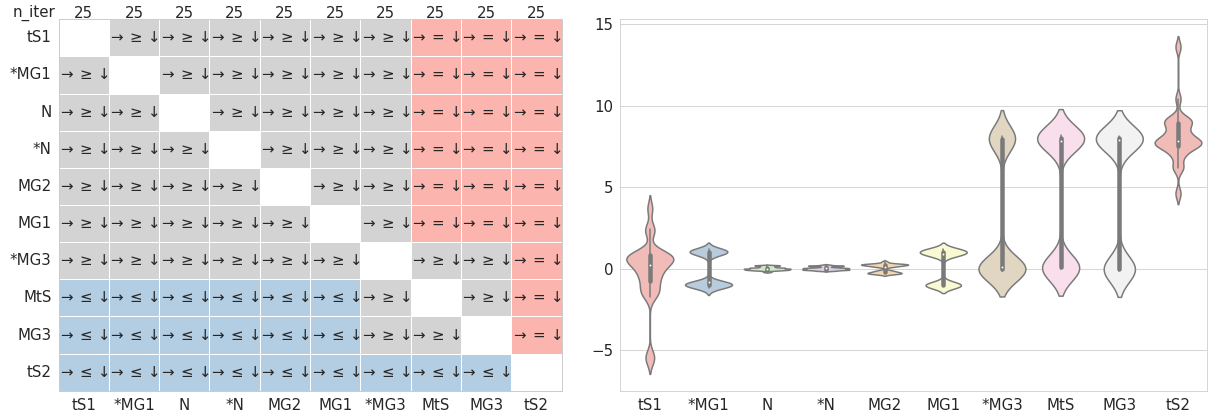

In [162]:

plt.rcParams.update({'font.size': 15})

home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)





fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(17, 6), gridspec_kw={'width_ratios':  [6,7]})
fig.tight_layout()

# ax1.axhline(y = 0.05, color = 'r', linestyle = '--')
# # plt.axhline(y = 1, color = 'r', linestyle = '-')
# # plt.axhline(y = 0., color = 'r', linestyle = '-')
# ax1.set_ylim((0,1))
# ax1.set_yticks(np.append(np.linspace(0,1,6),0.05))
# ax1.errorbar(powers.keys(), powers.values(), list(power_confidence_intervals.values()), linestyle='None', fmt = "none", capsize=4, label = "different mean", color = "#8856a7", linewidth=3)
# # plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
# ax1.errorbar(powers2.keys(), powers2.values(), list(power_confidence_intervals2.values()), linestyle='None', fmt = "none", capsize=4, label = "same mean", color = '#43a2ca', linewidth = 3)
# ax1.set_ylabel("frequency of rejection")
# ax1.set_xlabel("$\Delta$")
# ax1.legend(loc = "right")




comp = comp0
agent_names = ["N", "*N", "*MG1", "MG1", "MG2", "tS1", "MG3", "*MG3", "MtS", "tS2"]


id_sort = np.argsort(comp.mean_eval_values)
# Z = [comp.eval_values[comp.agent_names[i]] for i  in id_sort]

if agent_names is None:
    agent_names = comp.agent_names

links = np.zeros([len(agent_names),len(agent_names)])


decisions = {
        'smaller': 0,
        'equal': 1,
        'larger': 2,
        'na': 4,
    }

# for i in range(len(comp.comparisons)):
#     c = comp.comparisons[i]
#     decision = comp.decisions[str(c)]
#     if decision == "equal":
#         links[c[0],c[1]] = 0

#     elif decision == "larger":
#         links[c[0],c[1]] = 1

#     else:
#         links[c[0],c[1]] = -1

for i in range(len(comp.comparisons)):
    c = comp.comparisons[i]
    decision = comp.decisions[str(c)]
    if decision == "equal":
        links[c[0],c[1]] = decisions['equal']
        links[c[1],c[0]] = decisions['equal']
    elif decision == "larger":
        links[c[0],c[1]] = decisions['larger']
        links[c[1],c[0]] = decisions['smaller']
    else:
        links[c[0],c[1]] = decisions['smaller']
        links[c[1],c[0]] = decisions['larger']
print(links)


# links = links - links.T



links = links[id_sort,:][:, id_sort]
links = links + decisions['na'] * np.eye(len(links))
# links = links + 2*np.eye(len(links))
print(links)
annot = []
for i in range(len(links)):
    annot_i = []
    for j in range(len(links)):
        if i == j:
            annot_i.append(" ")                    
        elif links[i,j] == 0:
            annot_i.append("${\\rightarrow  =}\downarrow$")
        elif links[i,j] == 1:
            annot_i.append("${\\rightarrow \geq}\downarrow$")
        else:
            annot_i.append("${\\rightarrow  \leq}\downarrow$")
    annot+= [annot_i]

# if axes is None:
#     fig, (ax1, ax2) = plt.subplots(
#         2, 1, gridspec_kw={"height_ratios": [1, 2]}, figsize=(6,5)
#     )
# else:
#     (ax1, ax2) = axes


n_iterations = [comp.n_iters[comp.agent_names[i]] for i in id_sort]
the_table = ax2.table(
    cellText=[n_iterations], rowLabels=["n_iter"], loc="top", cellLoc="center", edges="open"
)


from matplotlib.colors import ListedColormap

colors = matplotlib.colormaps['Pastel1'].colors
colors = [colors[0], 'lightgray', colors[1], 'white']
print(colors)
cmap = ListedColormap(colors, name="my_cmap")

# # Generate a custom colormap
# colors = np.array([(103,169,207), (153,153,153), (239,138,98), (255,255,255)])/256
# cmap = LinearSegmentedColormap.from_list("my_cmap", colors, N=4)

# Draw the heatmap with the mask and correct aspect ratio
res = sns.heatmap(links, annot = annot, cmap=cmap, #vmax=2, center=0,
                  linewidths=.5, ax =ax2, 
                    cbar=False, yticklabels=np.array(agent_names)[id_sort],  
                    xticklabels=np.array(agent_names)[id_sort],fmt='')


# Drawing the frame
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)


Z = [comp.eval_values[comp.agent_names[i]] for i  in id_sort]
# Set up the matplotlib figure


pos = np.arange(len(Z))



sns.set_style("whitegrid")
sns.violinplot(data=Z, palette="Pastel1", bw = .2, linewidth=1.5, scale="width", ax = ax3)
# sns.violinplot(data=Z, palette="Set3", bw = .2, linewidth=1, scale="width", ax = ax3)
# sns.violinplot(data=Z, palette="Set3", bw=.2, linewidth=1, scale="width")


ax3.xaxis.set_label([])
# ax3.xaxis.tick_top()
ax3.set_xticks(pos)
ax3.set_xticklabels(np.array(agent_names)[id_sort])
# sns.despine(left=True, bottom=True)

# ax1.set_title("Case 1 and 2. Rejection frequency of null hypothesis according to $\Delta$.")
# ax2.set_title("Case 3. AdaStop decisions")
# ax3.set_title("Case 3. Empirical distributions")


# plt.savefig(os.path.join(workdir, "gaussianVSmg_exp1-2.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg_exp3.pdf"),bbox_inches='tight')

In [ ]:
links = np.zeros([len(agent_names),len(agent_names)])

    decisions = {
        'smaller': 0,
        'equal': 1,
        'larger': 2,
        'na': 4,
    }
    for i in range(len(comp.comparisons)):
        c = comp.comparisons[i]
        decision = comp.decisions[str(c)]
        if decision == "equal":
            links[c[0],c[1]] = decisions['equal']
            links[c[1],c[0]] = decisions['equal']
        elif decision == "larger":
            links[c[0],c[1]] = decisions['larger']
            links[c[1],c[0]] = decisions['smaller']
        else:
            links[c[0],c[1]] = decisions['smaller']
            links[c[1],c[0]] = decisions['larger']
    print(links)


    #links = links - links.T
    links = links[id_sort,:][:, id_sort]
    links = links + decisions['na'] * np.eye(len(links))
    annot = []
    for i in range(len(links)):
        annot_i = []
        for j in range(len(links)):
            if i == j:
                annot_i.append(" ")                    
            elif links[i,j] == decisions['equal']:
                annot_i.append("${\\rightarrow  =}\downarrow$")
            elif links[i,j] == decisions['larger']:
                annot_i.append("${\\rightarrow \geq}\downarrow$")
            else:
                annot_i.append("${\\rightarrow \leq}\downarrow$")
        annot += [annot_i]
    
    
    (ax1, ax2) = axs

    n_iterations = [comp.n_iters[comp.agent_names[i]] for i in id_sort]
    the_table = ax1.table(
        cellText=[n_iterations], loc="top", cellLoc="center", rowLabels=["n_iter"], 
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(12)

    # # Generate a custom colormap
    # colors = np.array([(103,169,207), (153,153,153), (239,138,98), (255,255,255)])/256
    # cmap = LinearSegmentedColormap.from_list("my_cmap", colors, N=4)
    from matplotlib.colors import ListedColormap
    colors = mpl.colormaps['Pastel1'].colors
    colors = [colors[0], 'lightgray', colors[1], 'white']
    cmap = ListedColormap(colors, name="my_cmap")

    # Draw the heatmap with the mask and correct aspect ratio
    res = sns.heatmap(links, annot=annot, cmap=cmap, # vmin=-1, vmax=2, center=0, 
        linewidths=.5, cbar=False, yticklabels=np.array(agent_names)[id_sort],
        xticklabels=['']*len(agent_names), fmt='', ax=ax1)